## 1. Defining the Question

### a) Specifying the Question

We have been recruited as football analysts by Mchezopesa Ltd to predict results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (We Should include rank in our training)

### b) Defining the Metric for Success

For this analysis to be considered successful, we must be able to create an effective model that will be able to:

1. Perform EDA.
2. Predict how many goals the home team scores.
3. Predict how many goals the away team scores.
4. Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)
5. Achieve an RMSE score that is less than 10% of the target mean
6. Achieve a high accuracy  score

### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992.

How the rankings are calculated:

The rankings are calculated using an algorithm called Elo. The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual matches to/from a team’s existing point total. The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

The dataset and glossary for this analysis can be found here https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc 

### d) Recording the Experimental Design

The following steps will be followed in conducting this analysis:

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Merging the Dataframes
6. Performing EDA
7. Prediction Models
8. Evaluation of the solution
9. Challenging the solution
10. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

## Reading the Data

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
rank = pd.read_csv('/content/fifa_ranking.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
result = pd.read_csv('/content/results.csv')
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Checking the Data

### The Ranking Dataset

In [ ]:
# Determining the no. of records in our dataset
#
print('This rank dataset has ' + str(rank.shape[0]) + ' rows, and ' + str(rank.shape[1]) + ' columns')

This rank dataset has 57793 rows, and 16 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
# checking the dataset information

rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# Let us view the summary statistics of our dataset

rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
# let us see the columns in our dataframe
rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe

profile = ProfileReport(rank, title="Rank Dataset Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

In [ ]:
# let us save our profile report
profile.to_file(output_file="Rank_Dataset_Profile_Report.html") 

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### The Result Dataset

In [ ]:
# Determining the no. of records in our dataset
#
print('This rank dataset has ' + str(result.shape[0]) + ' rows, and ' + str(result.shape[1]) + ' columns')

This rank dataset has 40839 rows, and 9 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
result.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
# checking the dataset information

result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Let us view the summary statistics of our dataset

result.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
# let us see the columns in our dataframe
result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe

profile = ProfileReport(result, title="Result Dataset Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us save our profile report
profile.to_file(output_file="Result_Dataset_Profile_Report.html") 

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

### The Rank Dataset

In [ ]:
# From our profile report, we can see that we don't have any duplicated rows
# But let us check 
rank.duplicated().sum()

37

In [ ]:
# let us drop our duplicates
rank.drop_duplicates(inplace=True)
rank.duplicated().sum()

0

In [ ]:
# Let Us Drop columns we will not need for this analysis
# We are dealing with rank in this analysis so, 
# we don't need columns unrelated to rank.

rank.drop(['country_abrv','total_points','previous_points','cur_year_avg',
           'cur_year_avg_weighted', 'last_year_avg','last_year_avg_weighted','two_year_ago_avg',
           'two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'], axis = 1, inplace = True)

# let us confirm that we have dropped the unnecessary columns
rank.head()

,rank,country_full,rank_change,confederation,rank_date
0,1,Germany,0,UEFA,1993-08-08
1,2,Italy,0,UEFA,1993-08-08
2,3,Switzerland,9,UEFA,1993-08-08
3,4,Sweden,0,UEFA,1993-08-08
4,5,Argentina,5,CONMEBOL,1993-08-08


In [ ]:
# Let us see if we have any null values
rank.isnull().sum()

rank             0
country_full     0
rank_change      0
confederation    0
rank_date        0
dtype: int64

In [ ]:
# Checking for Anomalies
# Checking for outliers in the columns with numerical data

# let us print out the IQR for each numerical column
Q1 = rank.quantile(0.25)
Q3 = rank.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rank           101.0
rank_change      3.0
dtype: float64


In [ ]:
# let us drop the outliers and see hpw much data we lose
rank_out = rank[~((rank < (Q1 - 1.5 * IQR)) |(rank > (Q3 + 1.5 * IQR))).any(axis=1)]
rank_out.shape
# outliers are 21,722 records. which is noy a big chunk of our data.

(49406, 5)

In [ ]:
# We decided not to drop outliers 
# because dropping such a large part of our data would seriously affect the validity of our results 
# now that we have a clean dataset, let us carry out our analysis

In [ ]:
# changing the date column to pandas datetime 
rank.rank_date = pd.to_datetime(rank.rank_date)
rank.dtypes

rank                      int64
country_full             object
rank_change               int64
confederation            object
rank_date        datetime64[ns]
dtype: object

### The Results Dataset

In [ ]:
# From our profile report, we can see that we don't have any duplicated rows
# But let us check 
result.duplicated().sum()

0

In [ ]:
# Let Us Drop columns we will not need for this analysis
# We don't need the city column.

result.drop(['city'], axis = 1, inplace = True)

# let us confirm that we have dropped the unnecessary columns
result.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [ ]:
# Let us see if we have any null values
result.isnull().sum()
# we have no null values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
neutral       0
dtype: int64

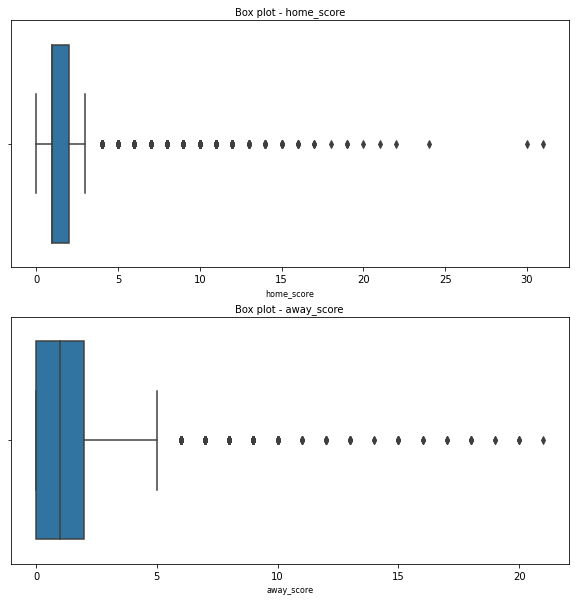

In [ ]:
# Checking for Anomalies
# Checking for outliers in the columns with numerical data

col_names = ['home_score', 'away_score']

fig, ax = plt.subplots(len(col_names), figsize=(10,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(result[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()
# we have outliers

In [ ]:
# let us print out the IQR for each numerical column
Q1 = result.quantile(0.25)
Q3 = result.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

home_score    1.0
away_score    2.0
neutral       0.0
dtype: float64


In [ ]:
# let us drop the outliers and see hpw much data we lose
result_out = result[~((result < (Q1 - 1.5 * IQR)) |(result > (Q3 + 1.5 * IQR))).any(axis=1)]
result_out.shape
# outliers are 14,406 records. which is noy a big chunk of our data.

(26433, 8)

In [ ]:
# We decided not to drop outliers 
# because dropping such a large part of our data would seriously affect the validity of our results 
# now that we have a clean dataset, let us carry out our analysis

In [ ]:
# changing the date column to pandas datetime 
result.date = pd.to_datetime(result.date)
result.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
country               object
neutral                 bool
dtype: object

### Merging

In [ ]:
# let us check the unique values in the date of our ranking dataset
rank.rank_date.unique()
# the range is from 1993 to 2018

array(['1993-08-08T00:00:00.000000000', '1993-09-23T00:00:00.000000000',
       '1993-10-22T00:00:00.000000000', '1993-11-19T00:00:00.000000000',
       '1993-12-23T00:00:00.000000000', '1994-02-15T00:00:00.000000000',
       '1994-03-15T00:00:00.000000000', '1994-04-19T00:00:00.000000000',
       '1994-05-17T00:00:00.000000000', '1994-06-14T00:00:00.000000000',
       '1994-07-21T00:00:00.000000000', '1994-09-13T00:00:00.000000000',
       '1994-10-25T00:00:00.000000000', '1994-11-22T00:00:00.000000000',
       '1994-12-20T00:00:00.000000000', '1995-02-20T00:00:00.000000000',
       '1995-04-19T00:00:00.000000000', '1995-05-16T00:00:00.000000000',
       '1995-06-13T00:00:00.000000000', '1995-07-25T00:00:00.000000000',
       '1995-08-22T00:00:00.000000000', '1995-09-19T00:00:00.000000000',
       '1995-10-17T00:00:00.000000000', '1995-11-21T00:00:00.000000000',
       '1995-12-19T00:00:00.000000000', '1996-01-24T00:00:00.000000000',
       '1996-02-21T00:00:00.000000000', '1996-04-24

In [ ]:
# let us check the unique values in the date of our results dataset
result.date.unique()
# the range is from 1872 to 2019

array(['1872-11-30T00:00:00.000000000', '1873-03-08T00:00:00.000000000',
       '1874-03-07T00:00:00.000000000', ...,
       '2019-07-18T00:00:00.000000000', '2019-07-19T00:00:00.000000000',
       '2019-07-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# since the ranking dataset begins in 1993 and ends in 2018
# let us filter our results dataset to only feature this timeframe
result1 = result[(result["date"] > '1993-01-01') &  (result["date"] < '2018-06-07')]
result1.shape

(22458, 8)

In [ ]:
# let us change our date columns to reflect the year and month only

rank['year'] = rank.rank_date.dt.year
result1['year'] = result1.date.dt.year

rank['month'] = rank.rank_date.dt.month
result1['month'] = result1.date.dt.month

In [ ]:
result1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral', 'year', 'month'],
      dtype='object')

### Merging to get Home Rank

In [ ]:
# let us rename our country column
rank.columns
rank.rename(columns={'country_full':'home_team'}, inplace=True)

In [ ]:
# Let us now join our dataframes on the three columns they have in common
home = pd.merge(rank, result1, how='right', on=['home_team','year','month'])
home.head()

,rank,home_team,rank_change,confederation,rank_date,year,month,date,away_team,home_score,away_score,tournament,country,neutral
0,NaN,Gabon,NaN,NaN,NaT,1993,1,1993-01-02,Burkina Faso,1,1,Friendly,Gabon,False
1,NaN,Gabon,NaN,NaN,NaT,1993,1,1993-01-03,Ghana,2,3,Friendly,Gabon,False
2,NaN,Kuwait,NaN,NaN,NaT,1993,1,1993-01-02,Lebanon,2,0,Friendly,Kuwait,False
3,NaN,Burkina Faso,NaN,NaN,NaT,1993,1,1993-01-03,Mali,1,0,Friendly,Gabon,True
4,NaN,Uganda,NaN,NaN,NaT,1993,1,1993-01-08,Tanzania,3,1,Friendly,Uganda,False


In [ ]:
# let us get the shape of our merged dataframe
home.shape

(22511, 14)

In [ ]:
# let us compare the shapes of all our dataframes
print(rank.shape)
print(result1.shape)
print(home.shape)

(57756, 7)
(22458, 10)
(22511, 14)


In [ ]:
#let us check for duplicates
home.duplicated().sum()

0

In [ ]:
# let us rename the rank column
home.rename(columns = {'rank': 'home_rank'}, inplace =True)
home.head()

,home_rank,home_team,rank_change,confederation,rank_date,year,month,date,away_team,home_score,away_score,tournament,country,neutral
0,NaN,Gabon,NaN,NaN,NaT,1993,1,1993-01-02,Burkina Faso,1,1,Friendly,Gabon,False
1,NaN,Gabon,NaN,NaN,NaT,1993,1,1993-01-03,Ghana,2,3,Friendly,Gabon,False
2,NaN,Kuwait,NaN,NaN,NaT,1993,1,1993-01-02,Lebanon,2,0,Friendly,Kuwait,False
3,NaN,Burkina Faso,NaN,NaN,NaT,1993,1,1993-01-03,Mali,1,0,Friendly,Gabon,True
4,NaN,Uganda,NaN,NaN,NaT,1993,1,1993-01-08,Tanzania,3,1,Friendly,Uganda,False


In [ ]:
# let us check for any null values in our merged dataframe
home.isnull().sum()

home_rank        3989
home_team           0
rank_change      3989
confederation    3989
rank_date        3989
year                0
month               0
date                0
away_team           0
home_score          0
away_score          0
tournament          0
country             0
neutral             0
dtype: int64

In [ ]:
# Let us drop these null values
home.dropna(inplace=True)
home.isnull().sum()

home_rank        0
home_team        0
rank_change      0
confederation    0
rank_date        0
year             0
month            0
date             0
away_team        0
home_score       0
away_score       0
tournament       0
country          0
neutral          0
dtype: int64

In [ ]:
# let us look at the resulting shape of our clea dataframe
home.shape

(18522, 14)

### Merging to get our Away Team Rank

In [ ]:
#let us rename our country column
rank.columns
rank.rename(columns={'home_team':'away_team'}, inplace=True)

In [ ]:
# Let us now join our dataframes on the three columns they have in common
away = pd.merge(rank, result1, how='right', on=['away_team','year','month'])
away.head()

,rank,away_team,rank_change,confederation,rank_date,year,month,date,home_team,home_score,away_score,tournament,country,neutral
0,NaN,Burkina Faso,NaN,NaN,NaT,1993,1,1993-01-02,Gabon,1,1,Friendly,Gabon,False
1,NaN,Lebanon,NaN,NaN,NaT,1993,1,1993-01-02,Kuwait,2,0,Friendly,Kuwait,False
2,NaN,Mali,NaN,NaN,NaT,1993,1,1993-01-03,Burkina Faso,1,0,Friendly,Gabon,True
3,NaN,Ghana,NaN,NaN,NaT,1993,1,1993-01-03,Gabon,2,3,Friendly,Gabon,False
4,NaN,Tanzania,NaN,NaN,NaT,1993,1,1993-01-08,Uganda,3,1,Friendly,Uganda,False


In [ ]:
# let us rename the rank column
away.rename(columns = {'rank': 'away_rank'}, inplace =True)
away.head()

,away_rank,away_team,rank_change,confederation,rank_date,year,month,date,home_team,home_score,away_score,tournament,country,neutral
0,NaN,Burkina Faso,NaN,NaN,NaT,1993,1,1993-01-02,Gabon,1,1,Friendly,Gabon,False
1,NaN,Lebanon,NaN,NaN,NaT,1993,1,1993-01-02,Kuwait,2,0,Friendly,Kuwait,False
2,NaN,Mali,NaN,NaN,NaT,1993,1,1993-01-03,Burkina Faso,1,0,Friendly,Gabon,True
3,NaN,Ghana,NaN,NaN,NaT,1993,1,1993-01-03,Gabon,2,3,Friendly,Gabon,False
4,NaN,Tanzania,NaN,NaN,NaT,1993,1,1993-01-08,Uganda,3,1,Friendly,Uganda,False


In [ ]:
# let us check for any null values in our merged dataframe
away.isnull().sum()

away_rank        4081
away_team           0
rank_change      4081
confederation    4081
rank_date        4081
year                0
month               0
date                0
home_team           0
home_score          0
away_score          0
tournament          0
country             0
neutral             0
dtype: int64

In [ ]:
# Let us drop these null values
away.dropna(inplace=True)
away.isnull().sum()

away_rank        0
away_team        0
rank_change      0
confederation    0
rank_date        0
year             0
month            0
date             0
home_team        0
home_score       0
away_score       0
tournament       0
country          0
neutral          0
dtype: int64

In [ ]:
away.shape

(18429, 14)

### Final Merge

In [ ]:
# merging the final dataframe that will be used for analysis
df = pd.merge(home, away, how = 'inner', left_on = ['year', 'month','away_team'],
              right_on = ['year', 'month','away_team'])
df.head()

,home_rank,home_team_x,rank_change_x,confederation_x,rank_date_x,year,month,date_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,away_rank,rank_change_y,confederation_y,rank_date_y,date_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y
0,19.0,Colombia,16.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,1.0,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Colombia,False
1,19.0,Colombia,16.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,1.0,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Argentina,False
2,5.0,Argentina,5.0,CONMEBOL,1993-08-08,1993,8,1993-08-29,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,1.0,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Colombia,False
3,5.0,Argentina,5.0,CONMEBOL,1993-08-08,1993,8,1993-08-29,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,1.0,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Argentina,False
4,19.0,Colombia,16.0,CONMEBOL,1993-08-08,1993,8,1993-08-15,Argentina,2,1,FIFA World Cup qualification,Colombia,False,5.0,5.0,CONMEBOL,1993-08-08,1993-08-01,Peru,0,1,FIFA World Cup qualification,Peru,False


In [ ]:
# let us check for any missing values
df.isnull().sum()
# we have no null values

home_rank          0
home_team_x        0
rank_change_x      0
confederation_x    0
rank_date_x        0
year               0
month              0
date_x             0
away_team          0
home_score_x       0
away_score_x       0
tournament_x       0
country_x          0
neutral_x          0
away_rank          0
rank_change_y      0
confederation_y    0
rank_date_y        0
date_y             0
home_team_y        0
home_score_y       0
away_score_y       0
tournament_y       0
country_y          0
neutral_y          0
dtype: int64

In [ ]:
# let us drop columns
df.drop(columns= ['date_x', 'country_x','rank_change_y','confederation_y','rank_date_y', 
'date_y','home_team_y','home_score_y','away_score_y','tournament_y','country_y',
'neutral_y', 'rank_date_x'], inplace=True)
df.head()

,home_rank,home_team_x,rank_change_x,confederation_x,year,month,away_team,home_score_x,away_score_x,tournament_x,neutral_x,away_rank
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,False,5.0


In [ ]:
# let us rename our columns
df.rename(columns={'home_team_x':'home_team',
                   'rank_change_x':'rank_change',
                   'confederation_x':'confederation',
                   'home_score_x':'home_score',
                   'away_score_x':'away_score',
                   'tournament_x':'tournament',
                   'neutral_x':'neutral_x'},
                   inplace=True)
df.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral_x,away_rank
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,False,5.0


In [ ]:
# let us get the shape of our final dataframe
df.shape

(28227, 12)

In [ ]:
# now with a clean dataframe, let us begin our analysis

# Adding Columns Useful for Our Analysis

In [ ]:
# let us create a column to hold the win lose or draw result
df['goal_diff'] = df.home_score - df.away_score
df['result'] = df.home_score - df.away_score

In [ ]:
# let us now define a funtion that will determine if a match is lose or win or draw
# from the perspective of our home team
a = df.home_score - df.away_score

def match_result(a):
  if a > 0:
    return 'WIN'
  elif a < 0:
    return 'LOSS'
  else:
    return 'DRAW'

In [ ]:
# creating a new column to give the match outcome
df['result']= df.result.apply(lambda a: match_result(a))

In [ ]:
# let us make sure our column has been added 
df.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral_x,away_rank,goal_diff,result
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,DRAW
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,DRAW
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,DRAW
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,DRAW
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,False,5.0,1,WIN


In [ ]:
# getting unique values of tournaments
df.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'AFC Asian Cup qualification',
       'Gold Cup', 'Lunar New Year Cup', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament', 'Dunhill Cup',
       'Cyprus International Tournament', 'Nehru Cup', 'COSAFA Cup',
       'Tournoi de France', 'Confederations Cup',

In [ ]:
# Creating a column to hold the tournament type

def type_tourn(i):
  if i == 'FIFA World Cup':
    return 'World Cup'
  elif i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

df['tournament_type'] = df.tournament.apply(lambda x: type_tourn(x))

In [ ]:
df.tournament_type.unique()

array(['Other', 'Friendly', 'World Cup'], dtype=object)

In [ ]:
df.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral_x,away_rank,goal_diff,result,tournament_type
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,DRAW,Other
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,DRAW,Other
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,DRAW,Other
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,False,67.0,0,DRAW,Other
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,False,5.0,1,WIN,Other


In [ ]:
# let us export our final dataframe to csv
df.to_csv('fifa.csv')

# Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# # finding the information about the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28227 entries, 0 to 28226
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   home_rank        28227 non-null  float64
 1   home_team        28227 non-null  object 
 2   rank_change      28227 non-null  float64
 3   confederation    28227 non-null  object 
 4   year             28227 non-null  int64  
 5   month            28227 non-null  int64  
 6   away_team        28227 non-null  object 
 7   home_score       28227 non-null  int64  
 8   away_score       28227 non-null  int64  
 9   tournament       28227 non-null  object 
 10  neutral_x        28227 non-null  bool   
 11  away_rank        28227 non-null  float64
 12  goal_diff        28227 non-null  int64  
 13  result           28227 non-null  object 
 14  tournament_type  28227 non-null  object 
dtypes: bool(1), float64(3), int64(5), object(6)
memory usage: 3.3+ MB


In [ ]:
# findng summary statistics of our dataframe
df.describe()

,home_rank,rank_change,year,month,home_score,away_score,away_rank,goal_diff
count,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000
mean,78.742268,1.115953,2006.090658,6.726255,1.597371,1.099904,81.758954,0.497467
std,51.049281,7.052333,6.792391,3.369884,1.637021,1.280592,52.553073,2.234440
min,1.000000,-62.000000,1993.000000,1.000000,0.000000,0.000000,1.000000,-15.000000
25%,36.000000,-2.000000,2000.000000,4.000000,0.000000,0.000000,38.000000,-1.000000
50%,74.000000,0.000000,2006.000000,6.000000,1.000000,1.000000,77.000000,0.000000
75%,114.000000,3.000000,2012.000000,10.000000,2.000000,2.000000,119.000000,2.000000
max,209.000000,73.000000,2018.000000,12.000000,31.000000,15.000000,209.000000,31.000000


Text(0.5, 1.0, 'Tournaments')

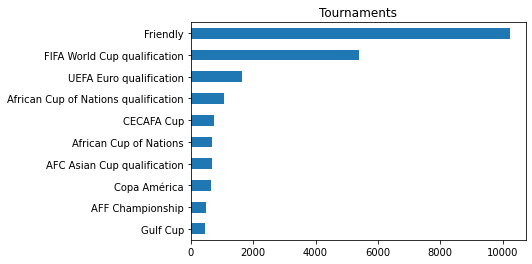

In [ ]:
# Bar graph showing tournaments

df.tournament.value_counts().head(10).sort_values().plot.barh()
plt.title('Tournaments')
# Friendly matches hold the top spot in the tournaments field

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

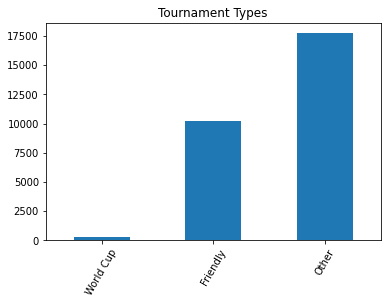

In [ ]:
# Bar graph showing tournaments type

df.tournament_type.value_counts().head(10).sort_values().plot.bar()
plt.title('Tournament Types')
degrees = 60
plt.xticks(rotation=degrees)
# Other types of tournaments are played frequently (probably yearly) whereas,
# the worldcup has a low number of occurence since it is only played every four years

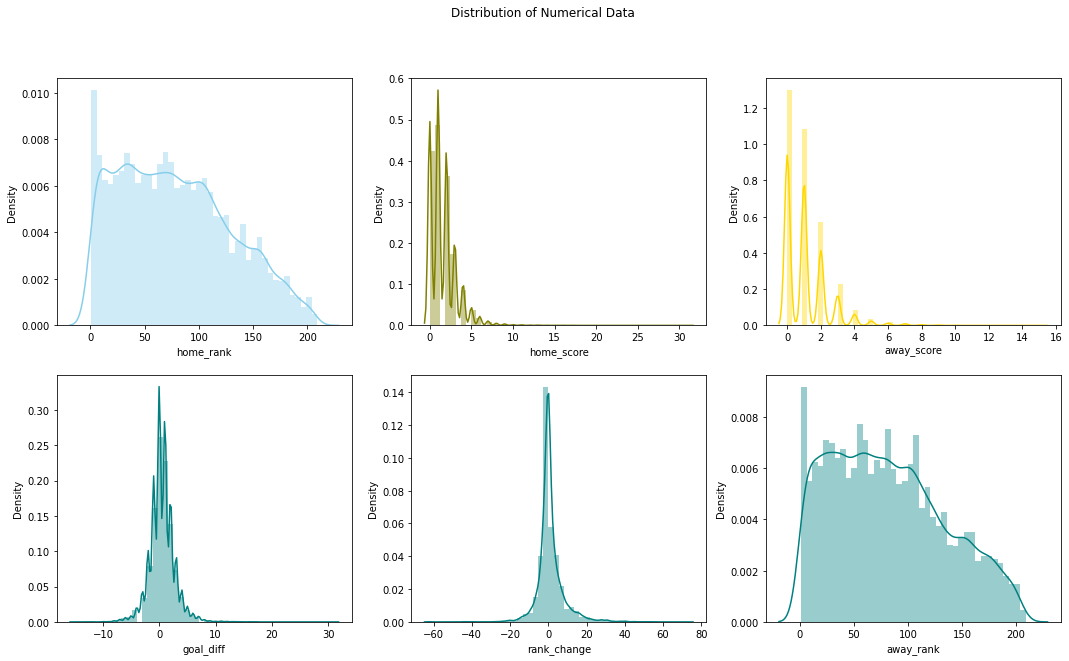

In [ ]:
# let us check the distributions of our data
# we will use 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Distribution of Numerical Data')

sns.distplot( df["home_rank"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["home_score"] , color="olive", ax=axes[0, 1])
sns.distplot( df["away_score"] , color="gold", ax=axes[0, 2])
sns.distplot( df["goal_diff"] , color="teal", ax=axes[1, 0])
sns.distplot( df["rank_change"] , color="teal", ax=axes[1, 1])
sns.distplot( df["away_rank"] , color="teal", ax=axes[1, 2])
# our data is normally distributed

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

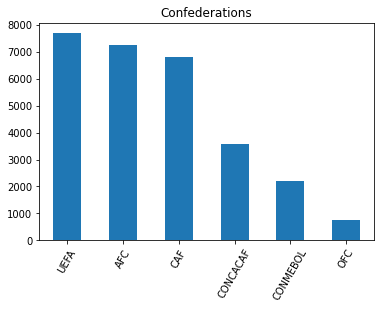

In [ ]:
# Bar graph showing confederations

df.confederation.value_counts().head(10).plot.bar()
plt.title('Confederations')
degrees = 60
plt.xticks(rotation=degrees)
# UEFA Confederations are the highest occuring in our dataframe

Text(0.5, 1.0, 'A Pie chart of Results of the Match')

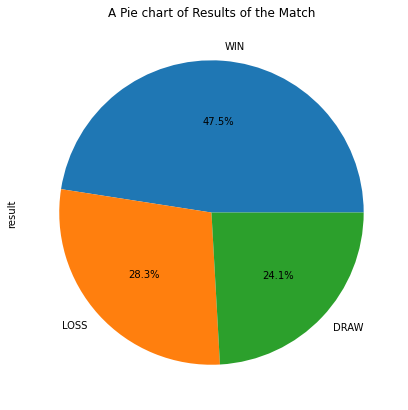

In [ ]:
# pie chart visualizing the wins, loses and draws

df.result.value_counts().plot(kind= 'pie', figsize=[7,7], autopct = '%1.1f%%')
plt.title('A Pie chart of Results of the Match') 

# from the piechart, we can see that wins were almost half of the dataframe 

### Bivariate Analysis

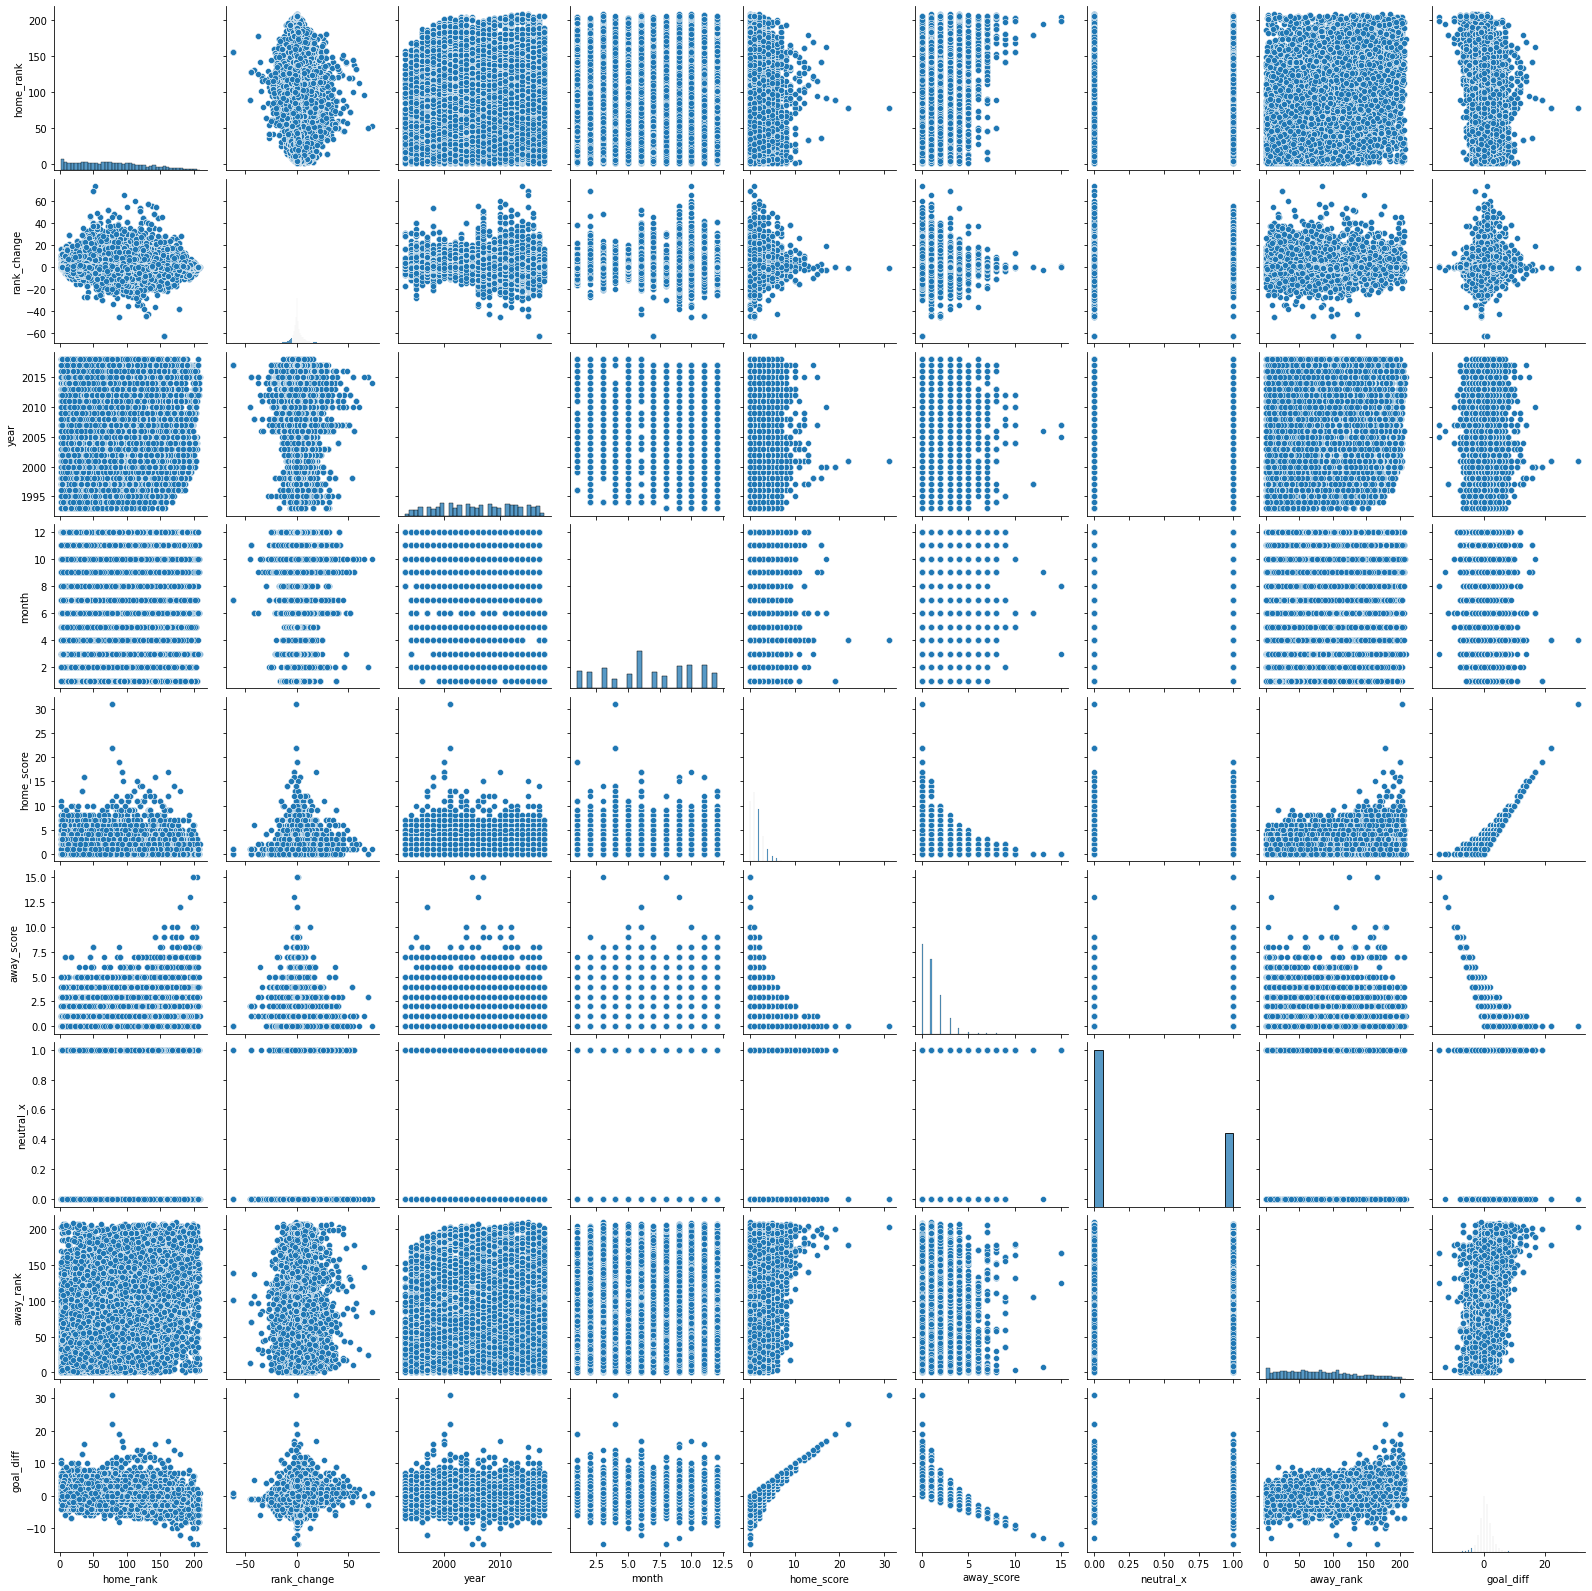

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

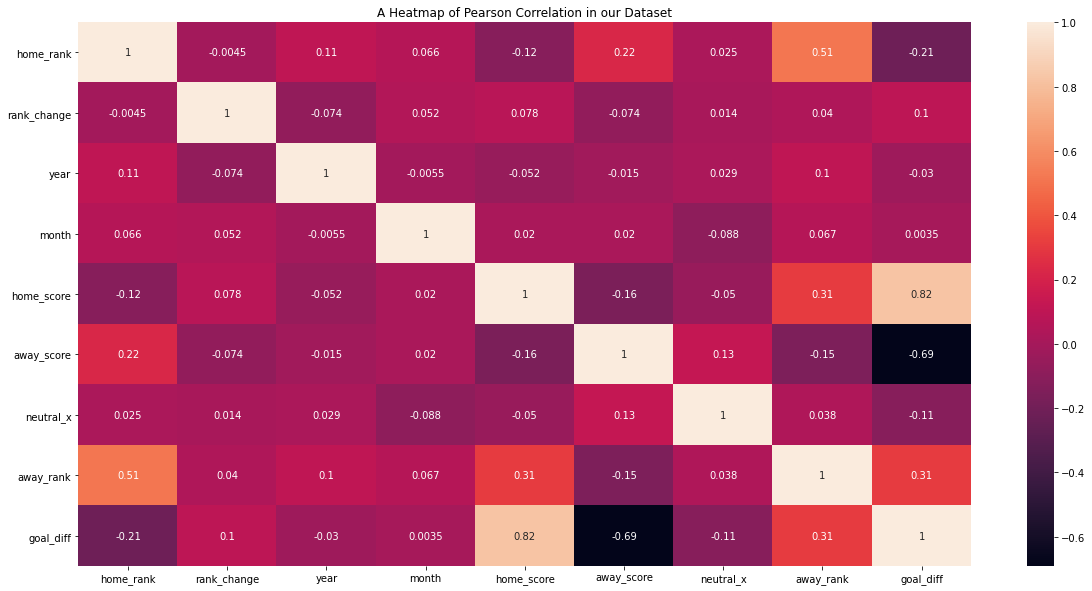

In [ ]:
# Calculating the pearson coefficient correlation
a = df.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset')
plt.show()

In [ ]:
# the bivariate analysis shows correlations between columns in our dataframe
# however there doesn't seem to be any high positie or negative correlation between the columns
# only the home score and goal difference have a high positive correlation to one one another (0.82)
# this is to be expected because when the home scores increase, so does the goal difference

# Predictive Analytics

In [ ]:
# creating a copy
df2 = df.copy()

In [ ]:
# Data for label encoding
df2['neutral_x'] = df2['neutral_x'].astype('category')
df2['tournament_type'] = df2['tournament_type'].astype('category')
df2['result'] = df2['result'].astype('category')

In [ ]:
# Label encoding the categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df2['neutral_x'] = labelencoder.fit_transform(df2['neutral_x'])
df2['tournament_type'] = labelencoder.fit_transform(df2['tournament_type'])
df2['result'] = labelencoder.fit_transform(df2['result'])

### Polynomial Regression

### Predicting Home Team Score

In [ ]:
df2.describe()

,home_rank,rank_change,year,month,home_score,away_score,neutral_x,away_rank,goal_diff,result,tournament_type
count,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000
mean,78.742268,1.115953,2006.090658,6.726255,1.597371,1.099904,0.319729,81.758954,0.497467,1.234350,0.647359
std,51.049281,7.052333,6.792391,3.369884,1.637021,1.280592,0.466380,52.553073,2.234440,0.813398,0.497845
min,1.000000,-62.000000,1993.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-15.000000,0.000000,0.000000
25%,36.000000,-2.000000,2000.000000,4.000000,0.000000,0.000000,0.000000,38.000000,-1.000000,1.000000,0.000000
50%,74.000000,0.000000,2006.000000,6.000000,1.000000,1.000000,0.000000,77.000000,0.000000,1.000000,1.000000
75%,114.000000,3.000000,2012.000000,10.000000,2.000000,2.000000,1.000000,119.000000,2.000000,2.000000,1.000000
max,209.000000,73.000000,2018.000000,12.000000,31.000000,15.000000,1.000000,209.000000,31.000000,2.000000,2.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [ ]:
#Declaring our Independent and Deendent variables 
X = df2[['home_rank', 'away_rank','tournament_type']]
y = df2['home_score']

In [ ]:
# Displaying the correlations between the variables
# we exclude the home score since it is our target variable
X.corr()

,home_rank,away_rank,tournament_type
home_rank,1.000000,0.512164,0.055573
away_rank,0.512164,1.000000,0.079061
tournament_type,0.055573,0.079061,1.000000


Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [ ]:
# Checking for Multicollinearity
# VIF dataframe 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

           feature       VIF
0        home_rank  3.987531
1        away_rank  4.085804
2  tournament_type  2.043248


VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.
our variables do not exceed 5

In [ ]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
# # Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Running the prediction
y_pred = pol_reg.predict(X_poly)
y_pred

array([2.122245  , 2.122245  , 2.53279756, ..., 1.40735648, 1.38700797,
       1.20179682])

In [ ]:
# evaluating our model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2) 

1.4261364550702234
0.2410224899192882


In [ ]:
# our model yields an RMSE of 1.45
# and our R2 is 26%
# the RMSE is almost the value of the mean of our target variable
# thereby we may need to reevaluate our model and redefine our independent variables

### Predicting Away Team Score

In [ ]:
df2.describe()

,home_rank,rank_change,year,month,home_score,away_score,neutral_x,away_rank,goal_diff,result,tournament_type
count,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000,28227.000000
mean,78.742268,1.115953,2006.090658,6.726255,1.597371,1.099904,0.319729,81.758954,0.497467,1.234350,0.647359
std,51.049281,7.052333,6.792391,3.369884,1.637021,1.280592,0.466380,52.553073,2.234440,0.813398,0.497845
min,1.000000,-62.000000,1993.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-15.000000,0.000000,0.000000
25%,36.000000,-2.000000,2000.000000,4.000000,0.000000,0.000000,0.000000,38.000000,-1.000000,1.000000,0.000000
50%,74.000000,0.000000,2006.000000,6.000000,1.000000,1.000000,0.000000,77.000000,0.000000,1.000000,1.000000
75%,114.000000,3.000000,2012.000000,10.000000,2.000000,2.000000,1.000000,119.000000,2.000000,2.000000,1.000000
max,209.000000,73.000000,2018.000000,12.000000,31.000000,15.000000,1.000000,209.000000,31.000000,2.000000,2.000000


In [ ]:
#Declaring our Independent and Dependent variables 
X = df2[['away_rank', 'home_rank','tournament_type']]
y = df2['away_score']

In [ ]:
# Displaying the correlations between the variables
# we exclude the home score since it is our target variable
X.corr()

,away_rank,home_rank,tournament_type
away_rank,1.000000,0.512164,0.079061
home_rank,0.512164,1.000000,0.055573
tournament_type,0.079061,0.055573,1.000000


Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [ ]:
# Checking for Multicollinearity
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                         for i in range(len(X.columns))] 
  
print(vif_data)

           feature       VIF
0        away_rank  4.085804
1        home_rank  3.987531
2  tournament_type  2.043248


VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.
our variables do not exceed 5

In [ ]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
# # Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Running the prediction
y_pred = pol_reg.predict(X_poly)
y_pred


array([0.65283752, 0.65283752, 0.57819769, ..., 0.93710377, 1.01957567,
       1.10346119])

In [ ]:
# evaluating our model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2) 

1.1486740169269718
0.19538639634347277


In [ ]:
# our model has an RMSE of 1.15
# and our R2 is 20%
# The RMSE is almost the value of the mean of our target variable
# thereby we may need to reevaluate our model and redefine our independent variables

### Logistic Regression

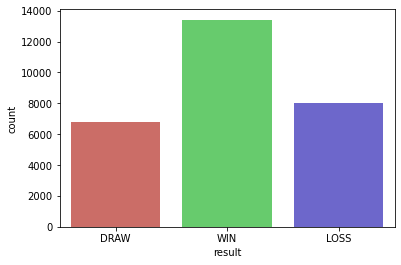

In [ ]:
# Checking our target variable

sns.countplot(x='result',data=df, palette='hls')

In [ ]:
df2.head()

,home_rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,neutral_x,away_rank,goal_diff,result,tournament_type
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,0,67.0,0,0,1
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,0,67.0,0,0,1
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,0,67.0,0,0,1
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,0,67.0,0,0,1
4,19.0,Colombia,16.0,CONMEBOL,1993,8,Argentina,2,1,FIFA World Cup qualification,0,5.0,1,2,1


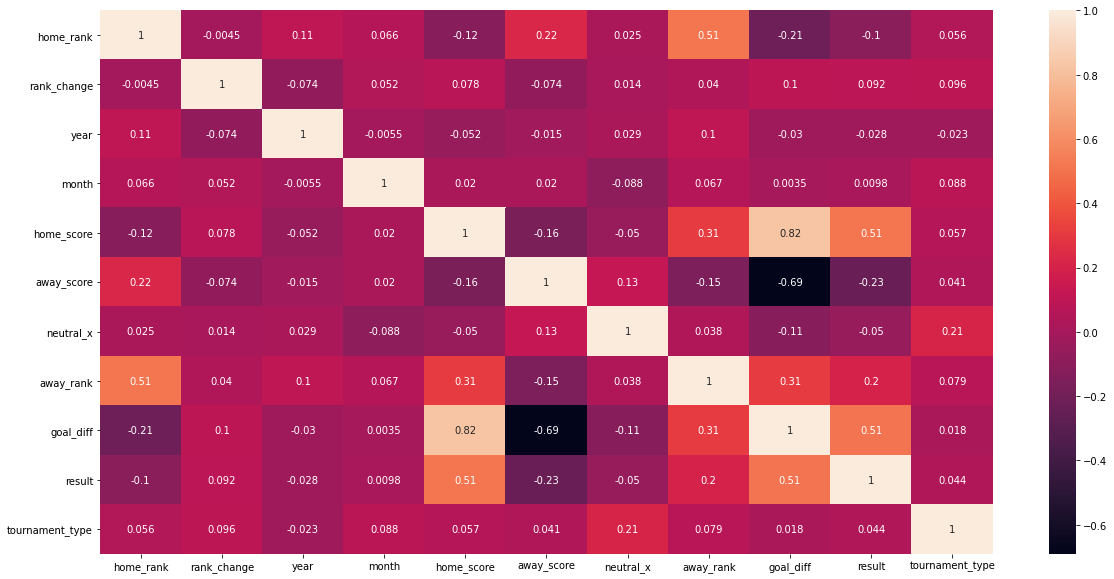

In [ ]:
# Checking for independence between features¶
# 
plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(), annot=True)  

In [ ]:
# Splitting our dataset
# We will drop all non-numerical data and data we have not encoded in our dataframe
X = df2.drop(["result", 'home_team', 'away_team','year','month','goal_diff', 'confederation', 'tournament'],axis=1)
y = df2["result"]

In [ ]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Measuring the accuracy of the model
#
from sklearn.metrics import accuracy_score
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')

The accuracy of the model is 1.0


In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1370,    0,    0],
       [   0, 1602,    0],
       [   0,    0, 2674]])

In [ ]:
# The model above has an accuracy of 100% 
# The model is clearly overfitting on the training data; 
# Therefore we need to reevaluate our model

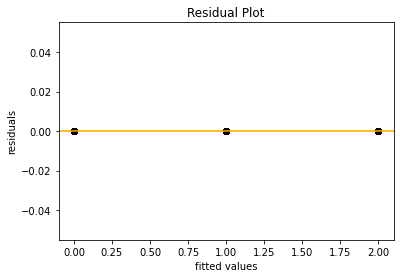

In [ ]:
# Checking for Residuals in our predicted values

residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='orange')
plt.show()

# There are no residuals

### Hyperparameter Tuning

### Random Search

In [ ]:
#
X = df2.drop(["result", 'home_team', 'away_team','year','month','goal_diff', 'confederation', 'tournament'],axis=1)
y = df2["result"]

# Performing Data Preprocessing
# ---
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
# random search logistic regression model on the fifa dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# define model
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)

search = clf.fit(X,y)

search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [ ]:
# our best params are 'C': 2.195254015709299, 'penalty': 'l1'

In [ ]:
# another method for random search 
#Random Search
# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Step 2: Instantiating RandomizedSearchCV object 
# ---
# 
from sklearn.model_selection import RandomizedSearchCV 
classifier = RandomForestClassifier(n_estimators=300, random_state=0)
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

# Step 3: Calling the fit method
# ---
#
random_sr.fit(X_train, y_train)

# Step 4: Checking the parameters that return the highest accuracy
# ---
#
best_parameters = random_sr.best_params_
print(best_parameters)

# Finding the obtained accuracy
# --
# 
best_result = random_sr.best_score_
print(best_result)
# 
# using the parameters generated below would yield an accuracy of 99% for our model.

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 4}
0.9999055266887105


# Challenging the Solution

Our Polynomial Regression prediction models were not effective since the RMSE yielded was not ideal. 

Therefore we may need to use other prediction models to predict our home and away scores effectively.

Did we have the right data?
Yes we did because it has the information we need to do our predictons.
however, we need to use better predictive models instead of polynomial regression.

In [ ]:
# compare algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = df2.drop(["result", 'home_team', 'away_team','year','month','goal_diff', 'confederation', 'tournament'],axis=1)
y = df2["result"]

# cannot use Rank 1 matrix in sklearn


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

LR: 0.999956 (0.000133)
LDA: 0.877552 (0.007867)
KNN: 0.689030 (0.010544)
CART: 0.999867 (0.000203)
NB: 0.828351 (0.008413)


KeyboardInterrupt: ignored

from the above we can see that DecisionTreeClassifier and LogisticRegression give us the most accurate model

# Conclusions

We were able to analyse our datasets and come up with 
We have been able to create predictive models.


For our polynomial regression models, the RMSE are close to the mean of the target variables meaning that this type of predictive model may not the optimal model to use for this dataframe. 
We need to reevaluate our variables and explore other models to perform predictions


For our logistic regression, we were able to obtain a model with 100$ level of accuracy.